# <span style="color:green">Brazil Cases</span>

### source: https://covid.saude.gov.br/

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# import plotly.graph_objects as go
# import plotly.express as px

# import tensorflow as tf
# from tensorflow import keras

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics

plt.rcParams.update({'font.size': 16})

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
dfMS = pd.read_csv('HIST_PAINEL_COVIDBR_17ago2020.csv', low_memory=False)
dfMS['data'] = pd.to_datetime(dfMS['data'], dayfirst=True)

In [4]:
dfMS = dfMS.loc[:,['data','estado','municipio','casosAcumulado','casosNovos','obitosAcumulado','obitosNovos']]
# dfMS = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS = dfMS.dropna()
dfMS

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12532,2020-03-27,AC,Acrelândia,0,0,0,0
12533,2020-03-28,AC,Acrelândia,0,0,0,0
12534,2020-03-29,AC,Acrelândia,2,2,0,0
12535,2020-03-30,AC,Acrelândia,6,4,0,0
12536,2020-03-31,AC,Acrelândia,7,1,0,0
...,...,...,...,...,...,...,...
70127,2020-08-13,TO,Xambioá,602,1,8,0
70128,2020-08-14,TO,Xambioá,608,6,8,0
70129,2020-08-15,TO,Xambioá,611,3,8,0
70130,2020-08-16,TO,Xambioá,611,0,8,0


In [5]:
dfMS['municipio'] = dfMS['municipio'].replace({'Á':'A', 'É':'E', 'Í':'I', 'Ó':'O', 'Ú':'U'})
dfMS

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12532,2020-03-27,AC,Acrelândia,0,0,0,0
12533,2020-03-28,AC,Acrelândia,0,0,0,0
12534,2020-03-29,AC,Acrelândia,2,2,0,0
12535,2020-03-30,AC,Acrelândia,6,4,0,0
12536,2020-03-31,AC,Acrelândia,7,1,0,0
...,...,...,...,...,...,...,...
70127,2020-08-13,TO,Xambioá,602,1,8,0
70128,2020-08-14,TO,Xambioá,608,6,8,0
70129,2020-08-15,TO,Xambioá,611,3,8,0
70130,2020-08-16,TO,Xambioá,611,0,8,0


In [6]:
listCity = dfMS['municipio'].astype(str).unique()
listCity

array(['Acrelândia', 'Assis Brasil', 'Brasiléia', ..., 'Tupiratins',
       'Wanderlândia', 'Xambioá'], dtype=object)

In [7]:
listState = dfMS['estado'].astype(str).unique()
listState

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [8]:
dfToday = dfMS[dfMS['data'] == dfMS['data'].max()]
dfToday

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
12675,2020-08-17,AC,Acrelândia,378,5,8,0
12819,2020-08-17,AC,Assis Brasil,439,1,9,0
12963,2020-08-17,AC,Brasiléia,942,6,14,0
13107,2020-08-17,AC,Bujari,352,0,6,0
13251,2020-08-17,AC,Capixaba,239,0,7,0
...,...,...,...,...,...,...,...
69411,2020-08-17,TO,Tocantínia,312,0,4,0
69699,2020-08-17,TO,Tupirama,45,0,1,0
69843,2020-08-17,TO,Tupiratins,7,0,0,0
69987,2020-08-17,TO,Wanderlândia,212,12,5,0


In [9]:
principaisMun = dfToday[
        (dfToday['casosAcumulado'] >= 150) & 
        (dfToday['obitosAcumulado'] >= 150)
]
mprincipaisMun = principaisMun.sort_values(by=['estado'], ascending=False)
principaisMun = principaisMun.dropna()
principaisMun

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
14691,2020-08-17,AC,Rio Branco,9662,11,371,2
250419,2020-08-17,AL,Maceió,24909,77,803,3
21171,2020-08-17,AM,Manaus,39563,143,2159,19
48963,2020-08-17,AP,Macapá,16229,41,416,3
288147,2020-08-17,BA,Feira de Santana,9952,60,164,10
...,...,...,...,...,...,...,...
557283,2020-08-17,SP,São José do Rio Preto,13622,75,337,6
557427,2020-08-17,SP,São José dos Campos,10263,94,281,0
558147,2020-08-17,SP,São Paulo,236163,297,10625,20
559155,2020-08-17,SP,São Vicente,5342,12,328,0


In [10]:
listState_02 = principaisMun['estado'].astype(str).unique()
listState_02

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP'], dtype=object)

In [11]:
listCity_02 = principaisMun['municipio'].astype(str).unique()
listCity_02

array(['Rio Branco', 'Maceió', 'Manaus', 'Macapá', 'Feira de Santana',
       'Itabuna', 'Salvador', 'Caucaia', 'Fortaleza', 'Juazeiro do Norte',
       'Maracanaú', 'Sobral', 'Brasília', 'Cariacica', 'Serra',
       'Vila Velha', 'Vitória', 'Aparecida de Goiânia', 'Goiânia',
       'Imperatriz', 'São Luís', 'Belo Horizonte', 'Contagem',
       'Governador Valadares', 'Uberlândia', 'Campo Grande', 'Cuiabá',
       'Rondonópolis', 'Várzea Grande', 'Ananindeua', 'Belém',
       'Castanhal', 'Marabá', 'Parauapebas', 'Santarém', 'Campina Grande',
       'João Pessoa', 'Cabo de Santo Agostinho', 'Camaragibe', 'Caruaru',
       'Jaboatão dos Guararapes', 'Olinda', 'Paulista', 'Recife',
       'Teresina', 'Curitiba', 'Belford Roxo', 'Campos dos Goytacazes',
       'Duque de Caxias', 'Itaboraí', 'Magé', 'Niterói', 'Nova Iguaçu',
       'Petrópolis', 'Rio de Janeiro', 'São Gonçalo',
       'São João de Meriti', 'Volta Redonda', 'Mossoró', 'Natal',
       'Porto Velho', 'Boa Vista', 'Canoas', 'P

In [12]:
len(listCity_02)

95

In [13]:
dfMS = dfMS[dfMS['municipio'].isin(listCity_02)]
dfMS = dfMS.sort_values(by=['estado','municipio'], ascending=True)
dfMS

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
14548,2020-03-27,AC,Rio Branco,0,0,0,0
14549,2020-03-28,AC,Rio Branco,25,25,0,0
14550,2020-03-29,AC,Rio Branco,31,6,0,0
14551,2020-03-30,AC,Rio Branco,35,4,0,0
14552,2020-03-31,AC,Rio Branco,34,-1,0,0
...,...,...,...,...,...,...,...
561887,2020-08-13,SP,Taboão da Serra,4848,110,223,2
561888,2020-08-14,SP,Taboão da Serra,4984,136,226,3
561889,2020-08-15,SP,Taboão da Serra,5085,101,228,2
561890,2020-08-16,SP,Taboão da Serra,5144,59,228,0


In [14]:
testMun = []
dMunicipio = []
dEstado = {}

dTest = {}

for index in range(len(listState_02)):
    
    dEstado[index] = dfMS[dfMS['estado'] == listState_02[index]]
    dEstado[index] = dEstado[index].dropna()
    dEstado[index].reset_index(drop=True, inplace=True)
    
    testMun = dEstado[index]['municipio'].astype(str).unique()
    dMunicipio.append(testMun)

    for jindex in range(len(dMunicipio[index])):
        dTest[jindex] = dfMS[dfMS['municipio'] == testMun[jindex]]
        dTest[jindex] = dTest[jindex].dropna()
        dTest[jindex].reset_index(drop=True, inplace=True)
        print(dTest[jindex])

          data estado   municipio  casosAcumulado  casosNovos  \
0   2020-03-27     AC  Rio Branco               0           0   
1   2020-03-28     AC  Rio Branco              25          25   
2   2020-03-29     AC  Rio Branco              31           6   
3   2020-03-30     AC  Rio Branco              35           4   
4   2020-03-31     AC  Rio Branco              34          -1   
..         ...    ...         ...             ...         ...   
283 2020-08-13     MT  Rio Branco              77           1   
284 2020-08-14     MT  Rio Branco              77           0   
285 2020-08-15     MT  Rio Branco              77           0   
286 2020-08-16     MT  Rio Branco              77           0   
287 2020-08-17     MT  Rio Branco              77           0   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  
.. 

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     CE  Maracanaú               0           0                0   
1   2020-03-28     CE  Maracanaú               0           0                0   
2   2020-03-29     CE  Maracanaú               1           1                0   
3   2020-03-30     CE  Maracanaú               1           0                0   
4   2020-03-31     CE  Maracanaú               1           0                0   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     CE  Maracanaú            5726          23              235   
140 2020-08-14     CE  Maracanaú            5777          51              234   
141 2020-08-15     CE  Maracanaú            5861          84              234   
142 2020-08-16     CE  Maracanaú            5887          26              234   
143 2020-08-17     CE  Maracanaú            5888           1              234   

     obitosNovos  
0       

          data estado       municipio  casosAcumulado  casosNovos  \
0   2020-03-27     MG  Belo Horizonte               0           0   
1   2020-03-28     MG  Belo Horizonte             129         129   
2   2020-03-29     MG  Belo Horizonte             143          14   
3   2020-03-30     MG  Belo Horizonte             163          20   
4   2020-03-31     MG  Belo Horizonte             163           0   
..         ...    ...             ...             ...         ...   
139 2020-08-13     MG  Belo Horizonte           26886         446   
140 2020-08-14     MG  Belo Horizonte           27485         599   
141 2020-08-15     MG  Belo Horizonte           27953         468   
142 2020-08-16     MG  Belo Horizonte           28373         420   
143 2020-08-17     MG  Belo Horizonte           28462          89   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  1       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PA  Santarém               0           0                0   
1   2020-03-28     PA  Santarém               0           0                0   
2   2020-03-29     PA  Santarém               0           0                0   
3   2020-03-30     PA  Santarém               0           0                0   
4   2020-03-31     PA  Santarém               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PA  Santarém            4870          70              187   
140 2020-08-14     PA  Santarém            5074         204              188   
141 2020-08-15     PA  Santarém            5272         198              188   
142 2020-08-16     PA  Santarém            5458         186              188   
143 2020-08-17     PA  Santarém            5576         118              188   

     obitosNovos  
0              0  
1

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     PE    Olinda               0           0                0   
1   2020-03-28     PE    Olinda               4           4                0   
2   2020-03-29     PE    Olinda               4           0                0   
3   2020-03-30     PE    Olinda               5           1                0   
4   2020-03-31     PE    Olinda               5           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     PE    Olinda            5261          39              448   
140 2020-08-14     PE    Olinda            5288          27              450   
141 2020-08-15     PE    Olinda            5317          29              451   
142 2020-08-16     PE    Olinda            5332          15              451   
143 2020-08-17     PE    Olinda            5356          24              451   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RJ  São Gonçalo               0           0   
1   2020-03-28     RJ  São Gonçalo               4           4   
2   2020-03-29     RJ  São Gonçalo               6           2   
3   2020-03-30     RJ  São Gonçalo               7           1   
4   2020-03-31     RJ  São Gonçalo               9           2   
..         ...    ...          ...             ...         ...   
139 2020-08-13     RJ  São Gonçalo            9618         104   
140 2020-08-14     RJ  São Gonçalo            9637          19   
141 2020-08-15     RJ  São Gonçalo            9637           0   
142 2020-08-16     RJ  São Gonçalo            9920         283   
143 2020-08-17     RJ  São Gonçalo            9944          24   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

          data estado  municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SC  Joinville               0           0                0   
1   2020-03-28     SC  Joinville               9           9                0   
2   2020-03-29     SC  Joinville               9           0                0   
3   2020-03-30     SC  Joinville               9           0                0   
4   2020-03-31     SC  Joinville              14           5                1   
..         ...    ...        ...             ...         ...              ...   
139 2020-08-13     SC  Joinville            9509         188              195   
140 2020-08-14     SC  Joinville            9945         436              200   
141 2020-08-15     SC  Joinville           10079         134              204   
142 2020-08-16     SC  Joinville           10124          45              205   
143 2020-08-17     SC  Joinville           10188          64              210   

     obitosNovos  
0       

          data estado municipio  casosAcumulado  casosNovos  obitosAcumulado  \
0   2020-03-27     SP   Limeira               0           0                0   
1   2020-03-28     SP   Limeira               0           0                0   
2   2020-03-29     SP   Limeira               0           0                0   
3   2020-03-30     SP   Limeira               0           0                0   
4   2020-03-31     SP   Limeira               0           0                0   
..         ...    ...       ...             ...         ...              ...   
139 2020-08-13     SP   Limeira            3195          53              181   
140 2020-08-14     SP   Limeira            3222          27              184   
141 2020-08-15     SP   Limeira            3303          81              186   
142 2020-08-16     SP   Limeira            3314          11              186   
143 2020-08-17     SP   Limeira            3314           0              186   

     obitosNovos  
0              0  
1

          data estado    municipio  casosAcumulado  casosNovos  \
0   2020-03-27     RN  São Vicente               0           0   
1   2020-03-28     RN  São Vicente               0           0   
2   2020-03-29     RN  São Vicente               0           0   
3   2020-03-30     RN  São Vicente               0           0   
4   2020-03-31     RN  São Vicente               0           0   
..         ...    ...          ...             ...         ...   
283 2020-08-13     SP  São Vicente            5215          64   
284 2020-08-14     SP  São Vicente            5272          57   
285 2020-08-15     SP  São Vicente            5322          50   
286 2020-08-16     SP  São Vicente            5330           8   
287 2020-08-17     SP  São Vicente            5342          12   

     obitosAcumulado  obitosNovos  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0       

In [15]:
timestamps = sorted(set(dfMS.loc[:, 'data'].values))

In [16]:
# dEstado = {}
# for index in range(len(listState)):
#     dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
#     dEstado[index] = dEstado[index].dropna()
#     dEstado[index].reset_index(drop=True, inplace=True)

In [17]:
# testMun = []
# dMunicipio = []
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)

### Coleta dos dados por municipio de cada estado

In [18]:
# testMun = []
# dMunicipio = []
# dEstado = {}

# dTest = {}

# for index in range(len(listState)):
    
#     dEstado[index] = dfMS[dfMS['estado'] == listState[index]]
#     dEstado[index] = dEstado[index].dropna()
#     dEstado[index].reset_index(drop=True, inplace=True)
    
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)

#     for jindex in range(len(dMunicipio[index])):
#         dTest[jindex] = dfMS[dfMS['municipio'] == testMun[jindex]]
#         dTest[jindex] = dTest[jindex].dropna()
#         dTest[jindex].reset_index(drop=True, inplace=True)
#         print(dTest[jindex])

### Municipios por estado

In [19]:
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)
#     print(listState[index],len(dMunicipio[index]))

In [20]:
# for index in range(len(listState)):
#     testMun = dEstado[index]['municipio'].astype(str).unique()
#     dMunicipio.append(testMun)
#     print()
#     for jindex in range(len(dMunicipio[index])):
#         print(listState[index],testMun[jindex])

In [21]:
dMunicipio[0]

array(['Rio Branco'], dtype=object)

In [22]:
dfSP = dfToday[(dfToday['estado'] == 'SP') & (dfToday['casosAcumulado'] > 3500)]
dfSP = dfSP.sort_values(by=['casosAcumulado'], ascending=False)
dfSP

,data,estado,municipio,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
558147,2020-08-17,SP,São Paulo,236163,297,10625,20
492915,2020-08-17,SP,Campinas,23825,205,882,5
555555,2020-08-17,SP,São Bernardo do Campo,19628,27,711,0
555267,2020-08-17,SP,Santos,18420,61,533,0
507891,2020-08-17,SP,Guarulhos,14666,18,1149,0
...,...,...,...,...,...,...,...
481827,2020-08-17,SP,Araçatuba,4872,31,106,0
508611,2020-08-17,SP,Hortolândia,4761,38,94,0
561171,2020-08-17,SP,Sumaré,4711,29,128,1
524883,2020-08-17,SP,Mauá,4349,12,250,-1


In [23]:
today = pd.to_datetime("today").date()
today

datetime.date(2020, 8, 19)

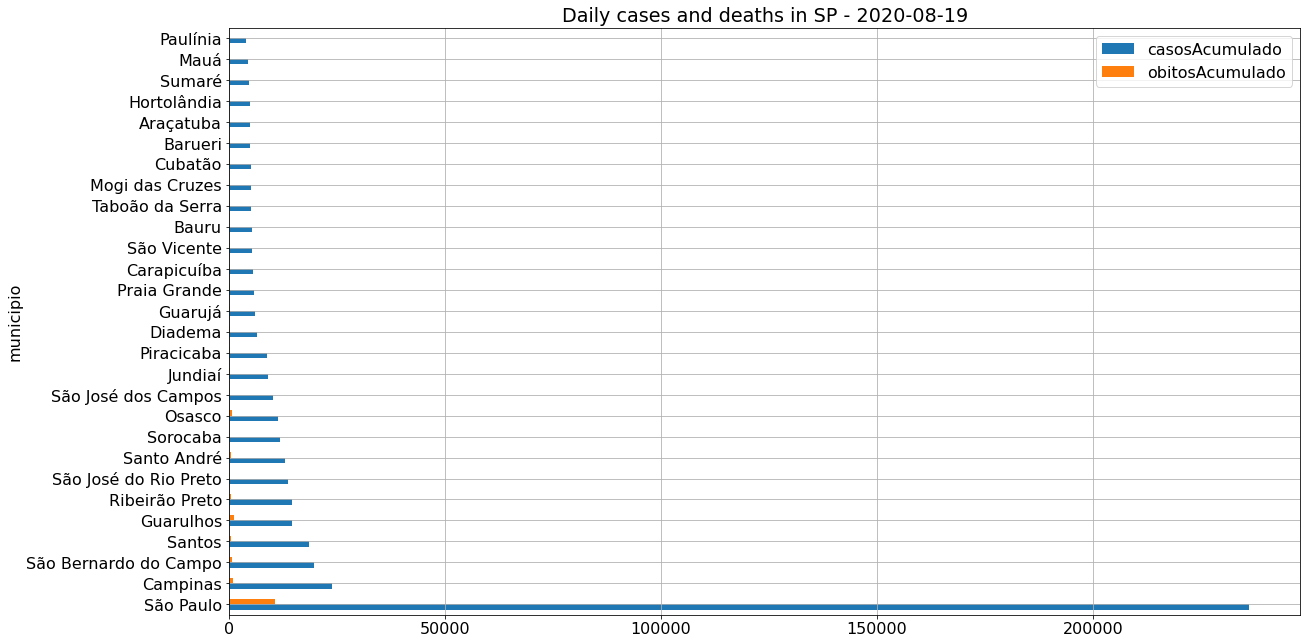

In [24]:
dfSP.plot.barh(x='municipio', y=['casosAcumulado','obitosAcumulado'], figsize=(19.20,10.80))
plt.title('Daily cases and deaths in SP - '+str(today))
plt.grid()

In [25]:
dfSP = dfSP.loc[:,['municipio','casosAcumulado','obitosAcumulado']]
dfSP = dfSP.set_index('municipio')
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
São Paulo,236163,10625
Campinas,23825,882
São Bernardo do Campo,19628,711
Santos,18420,533
Guarulhos,14666,1149
...,...,...
Araçatuba,4872,106
Hortolândia,4761,94
Sumaré,4711,128


In [26]:
dfSP

,casosAcumulado,obitosAcumulado
municipio,,
São Paulo,236163,10625
Campinas,23825,882
São Bernardo do Campo,19628,711
Santos,18420,533
Guarulhos,14666,1149
...,...,...
Araçatuba,4872,106
Hortolândia,4761,94
Sumaré,4711,128


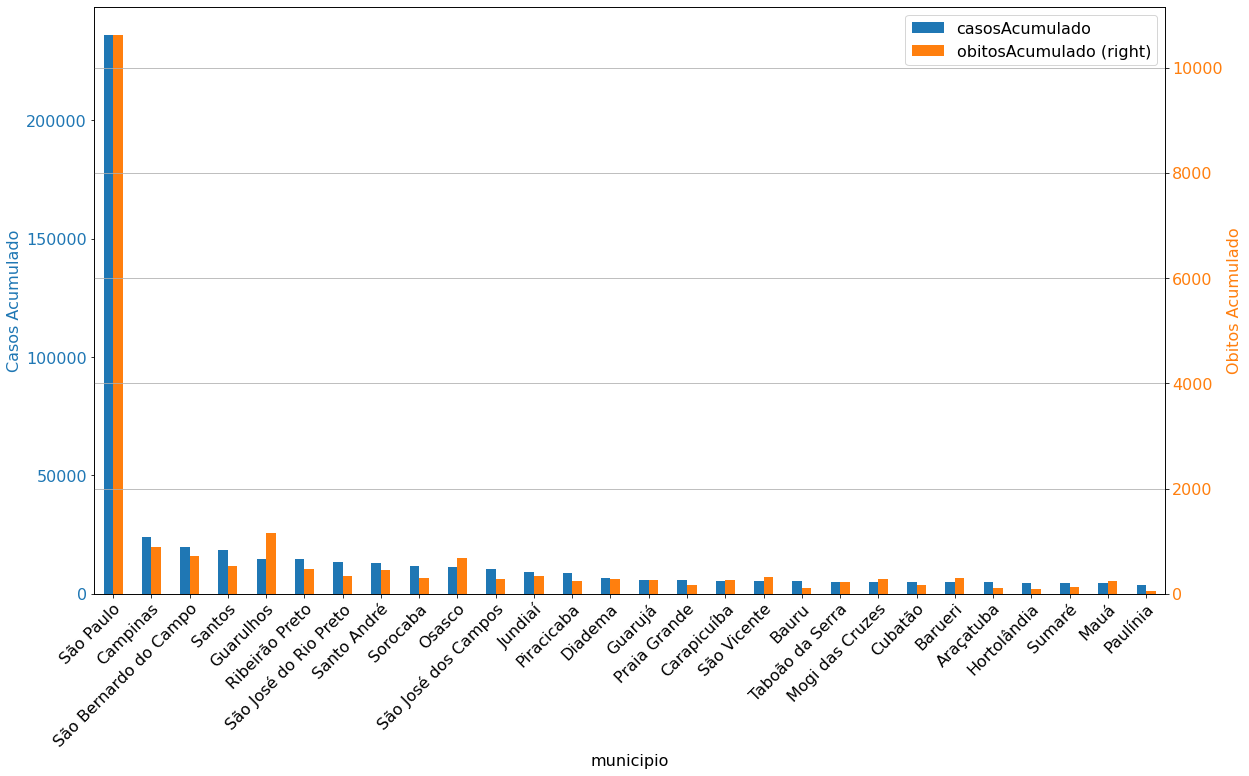

In [27]:
dfSP.plot.bar(figsize=(19.20,10.80), secondary_y= 'obitosAcumulado')

ax1, ax2 = plt.gcf().get_axes()
# ax1.tick_params(axis='x', labelrotation=55, ha='right')
# plt.xticks(rotation=15,ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

color = 'tab:blue'
ax1.set_ylabel('Casos Acumulado', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_ylabel('Obitos Acumulado', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.title('Casos e obitos acumulados nos municipios de '+str(dfEstado[10]+' em '+str(today)))

plt.grid()
plt.show()

In [28]:
dfMSelect = dfMS.loc[:,['data','estado','municipio','casosNovos','obitosNovos']]
sumCases = dfMSelect.groupby(['estado']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['casosNovos'] <= 120000, ['estado']] = 'Other_States'

In [29]:
sumCases = sumCases.groupby(['estado']).sum()
sumCases = sumCases.sort_values(by=['casosNovos'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

,estado,casosNovos,obitosNovos
0,Other_States,810318,31980
1,SP,478146,20645
2,DF,138735,2042
3,RJ,135736,12372


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa96aa1fef0>,
      dtype=object)

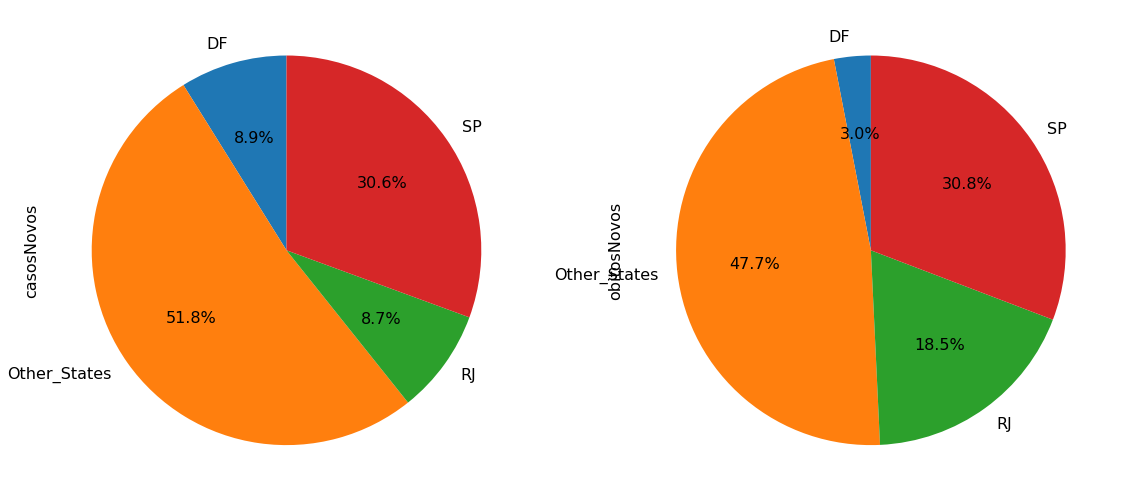

In [30]:
sumCases.groupby(['estado']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [31]:
# fig = plt.figure(figsize=(19.20,10.80)) # Create matplotlib figure
# ax = fig.add_subplot(111) # Create matplotlib axes



# width = 0.4
# dfSP.casosAcumulado.plot(kind='bar',color='red', ax=ax, width=width, position=1)
# ax.set_ylabel('Casos Acumulados')
# ax.set_xlabel('municipio')

# ax2 = ax.twinx() 


# dfSP.obitosAcumulado.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
# ax.set_ylabel('Obtidos Acumulados')

# ax2.set_ylabel('Price')

# plt.grid()
# plt.show()

In [32]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()

In [33]:
# fig, ax1 = plt.subplots(figsize=(19.20,10.80))

# color = 'tab:blue'
# ax1.bar(dfSP.index, dfSP.casosAcumulado, color=color, label='Total Cases')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Total Cases', color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y')
# plt.grid()

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.bar(dfSP.index, dfSP.obitosAcumulado, color=color, label = 'Total Deaths')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Total Deaths', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# #plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# # ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
# plt.gcf().autofmt_xdate()

# fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

# plt.show()